In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

office_data_path = "Resources/the_office_series.csv"

office_metadata = pd.read_csv(office_data_path)

office_metadata.head()

,Unnamed: 0,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels


In [13]:
#Start cleaning the DF
clean_df = office_metadata.rename(columns={"Unnamed: 0":"Episode", "Viewership": "Viewership(MM)"})
clean_df = clean_df.drop('Episode', 1)
clean_df = clean_df.drop('About', 1)


clean_df.head()

C:\Users\matth\AppData\Local\Temp/ipykernel_24320/2066472352.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  clean_df = clean_df.drop('Episode', 1)
C:\Users\matth\AppData\Local\Temp/ipykernel_24320/2066472352.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  clean_df = clean_df.drop('About', 1)


,Season,EpisodeTitle,Ratings,Votes,Viewership(MM),Duration,Date,GuestStars,Director,Writers
0,1,Pilot,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,Diversity Day,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak
2,1,Health Care,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein
3,1,The Alliance,8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur
4,1,Basketball,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels


In [14]:
#Exporting to csv to use
clean_df.to_csv('Resources/office_clean.csv', index=False)

##  Data Analysis

In [15]:
office_data_path = "Resources/Office_clean.csv"

office_clean = pd.read_csv(office_data_path)

office_clean.head()

,Season,EpisodeTitle,Ratings,Votes,Viewership(MM),Duration,Date,GuestStars,Director,Writers
0,1,Pilot,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,Diversity Day,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak
2,1,Health Care,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein
3,1,The Alliance,8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur
4,1,Basketball,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels


In [17]:
# Using the aggregation method, produce summary statistics in a single line
view_agg_df = office_clean.groupby(['Season'])['Viewership(MM)'].agg(['mean', 'median'])
view_agg_df


,mean,median
Season,,
1,6.366667,5.600
2,8.168182,8.050
3,8.494348,8.630
4,8.547857,8.495
5,8.756538,8.340
6,7.766154,7.570
7,7.305833,7.285
8,5.385417,5.405
9,4.138696,4.150


In [27]:
top_episodes = office_clean.nlargest(5, ['Viewership(MM)'])


top_episodes


,Season,EpisodeTitle,Ratings,Votes,Viewership(MM),Duration,Date,GuestStars,Director,Writers
77,5,Stress Relief,9.7,8170,22.91,60,1 February 2009,"Cloris Leachman, Jack Black, Jessica Alba",Jeffrey Blitz,Paul Lieberstein
0,1,Pilot,7.5,4936,11.20,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
17,2,The Injury,9.1,4314,10.30,22,12 January 2006,NaN,Bryan Gordon,Mindy Kaling
40,3,The Return,8.8,3211,10.20,28,18 January 2007,NaN,Greg Daniels,Lee Eisenberg | Gene Stupnitsky | Michael Schur
39,3,Traveling Salesmen,8.6,3053,10.12,22,11 January 2007,NaN,Greg Daniels,Michael Schur | Lee Eisenberg | Gene Stupnitsky


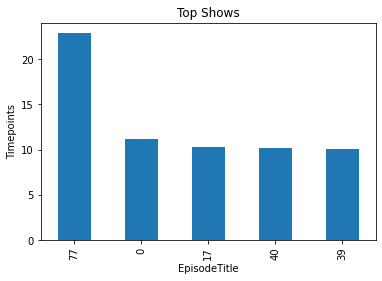

In [32]:
# Generate a bar plot showing the top shows using Pandas.

regim_plot = top_episodes['Viewership(MM)']
regim_plot.plot(kind="bar")
plt.title("Top Shows")
plt.ylabel("Timepoints")
plt.xlabel("EpisodeTitle")
plt.show()